In [60]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
import scikitplot.metrics as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

In [61]:
con = sqlite3.connect('/mydata/final.sqlite')
 

In [62]:
final = pd.read_sql_query(""" SELECT * FROM Reviews""", con)

In [63]:
positive = final[final.Score == 'positive']
positive = positive.sample(frac=0.035,random_state=1)

negative = final[final.Score == 'negative']
negative = negative.sample(frac=0.15,random_state=1)

final = pd.concat([positive,negative],axis=0)

In [64]:
final.shape

(19313, 12)

In [65]:
import datetime

final["Time"] = final["Time"].map(lambda t: datetime.datetime.fromtimestamp(int(t)).strftime('%Y-%m-%d %H:%M:%S'))
final = final.sort_values('Time',axis=0,kind="quicksort", ascending=True).reset_index(drop=True)

In [66]:
l = final['Score']
final = final.drop("Score", axis = 1)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, l, test_size=0.3, random_state=0)

In [68]:
tf_idf_vect = TfidfVectorizer(ngram_range = (1,2))
final_tf_idf = tf_idf_vect.fit_transform(X_train['CleanedText'].values)


In [69]:
print("type = ", type(final_tf_idf))
print("shape = ", final_tf_idf.get_shape())
print("number of unique words ", final_tf_idf.get_shape()[1])

type =  <class 'scipy.sparse.csr.csr_matrix'>
shape =  (13519, 309255)
number of unique words  309255


In [70]:
final_tf_idf_test = tf_idf_vect.transform(X_test['CleanedText'].values)

In [71]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler(with_mean = False)

In [72]:
standardized_data = s.fit_transform(final_tf_idf)
                                                                    

In [73]:
standardized_data_test = s.fit_transform(final_tf_idf_test)

In [74]:
# K values from 0,50(Odd numbers)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree', n_jobs = -1) # Creating K-NN classifier with KD3 Algorithm
    scores = cross_val_score(knn, standardized_data, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 1.


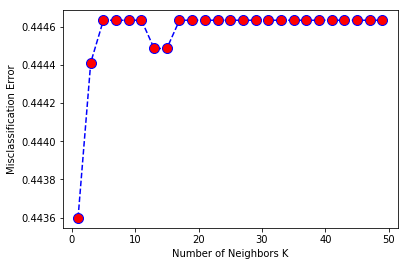

the misclassification error for each k value is :  [0.444 0.444 0.445 0.445 0.445 0.445 0.444 0.444 0.445 0.445 0.445 0.445
 0.445 0.445 0.445 0.445 0.445 0.445 0.445 0.445 0.445 0.445 0.445 0.445
 0.445]


In [75]:
plt.plot(neighbors, MSE,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [76]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree', n_jobs = -1)
knn_optimal.fit(standardized_data, y_train)
pred = knn_optimal.predict(standardized_data_test)
acc = accuracy_score(y_test, pred) * 100

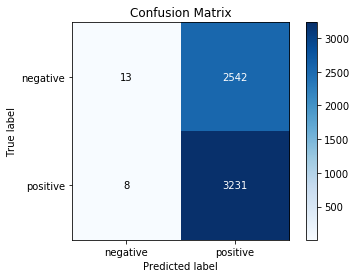

In [77]:
skplt.plot_confusion_matrix(y_test ,pred)

In [78]:
print(classification_report(y_test ,pred))

             precision    recall  f1-score   support

   negative       0.62      0.01      0.01      2555
   positive       0.56      1.00      0.72      3239

avg / total       0.59      0.56      0.41      5794



In [79]:
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 55.988954%


In [ ]:
# K values from 0,50(Odd numbers)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute', n_jobs = -1) # Creating K-NN classifier with brute Algorithm
    scores = cross_val_score(knn, standardized_data, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

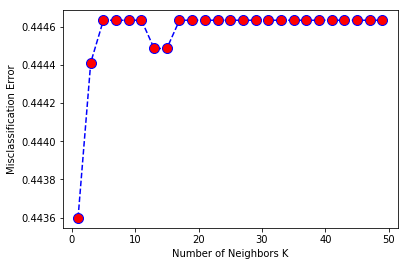

the misclassification error for each k value is :  [0.444 0.444 0.445 0.445 0.445 0.445 0.444 0.444 0.445 0.445 0.445 0.445
 0.445 0.445 0.445 0.445 0.445 0.445 0.445 0.445 0.445 0.445 0.445 0.445
 0.445]


In [23]:
plt.plot(neighbors, MSE,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [24]:
knn_optimal = KNeighborsClassifier(n_neighbors= optimal_k , algorithm='brute', n_jobs = -1)
knn_optimal.fit(standardized_data, y_train)
pred = knn_optimal.predict(standardized_data_test)
acc = accuracy_score(y_test, pred) * 100


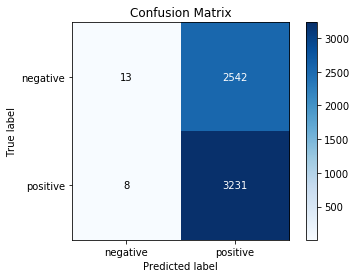

In [25]:
skplt.plot_confusion_matrix(y_test ,pred)

In [26]:
print(classification_report(y_test ,pred))

             precision    recall  f1-score   support

   negative       0.62      0.01      0.01      2555
   positive       0.56      1.00      0.72      3239

avg / total       0.59      0.56      0.41      5794



In [27]:
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 55.988954%


In [1]:
from prettytable import PrettyTable

In [2]:
x = PrettyTable()

In [3]:
x.field_names = ["Knn-Algorithm", "k", "Train Error %","Test Error %"]

In [4]:
x.add_row(["KD3", 1, 44.4, 44.02])
x.add_row(["Brute", 1, 44.4, 44.02])

CONCLUSION

In [5]:
print(x)

+---------------+---+---------------+--------------+
| Knn-Algorithm | k | Train Error % | Test Error % |
+---------------+---+---------------+--------------+
|      KD3      | 1 |      44.4     |    44.02     |
|     Brute     | 1 |      44.4     |    44.02     |
+---------------+---+---------------+--------------+
